## ML4CommNet Project

### Data import

In [1]:
bulb_ip = [1,2,10,11,12,18,19,27,28,29]
camera_ip = [3,13,20,30]
fire_ip = [4,14,21,31]
plug_ip = [5,6,7,15,16,22,23,24,32,33]
smart_tv_ip = [8,25]
thermo_ip = [9,17,26,34]

def label_sensor(row):
    if any('.{}.'.format(i) in row['SrcAddr'] for i in bulb_ip):
        return 'Bulb'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in camera_ip):
        return 'Camera'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in fire_ip):
        return 'Fire'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in plug_ip):
        return 'Plug'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in smart_tv_ip):
        return 'SmartTv'
    if any('.{}.'.format(i) in row['SrcAddr'] for i in thermo_ip):
        return 'Thermo'
    
    return 'Other'

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataframe from...
df_NaN = pd.read_csv('experiments/argus.csv', skiprows=1, delim_whitespace=True, names=['StartTime', 'Proto', 'SrcAddr', 'DstAddr', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Dur', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Retrans', 'SrcRetra', 'DstRetra', 'pRetran', 'Rate', 'SrcRate', 'DstRate', 'Dir', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat'])

# clean * values if not done from outside (DO IT from outisde)
# df = df.replace('\*', '', regex=True)

# assign labels to the sensors
df_NaN['Sensor'] = df_NaN.apply(lambda row: label_sensor(row), axis=1)

#dropNA for majority sensors
df_majority = df_NaN.loc[df_NaN['Sensor'].isin(['Camera', 'Plug', 'SmartTv', 'Fire'])].dropna()
df_minority = df_NaN.loc[df_NaN['Sensor'].isin(['Thermo', 'Bulb'])].fillna(0)
df = pd.concat([df_minority, df_majority])

print("Feature number => {}".format(df.shape[1]))
df.head()

#dummy features for something?
#Normalizare

Feature number => 33


,StartTime,Proto,SrcAddr,DstAddr,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,...,SrcRate,DstRate,Dir,State,SrcWin,DstWin,TcpRtt,SynAck,AckDat,Sensor
0,15:29:14.361031,tcp,10.0.0.1.37523,10.0.0.251.1883,32,18,14,4332,2528,1804,...,10.146207,7.758864,->,CON,42496.0,43008.0,0.745406,0.000024,0.745382,Bulb
1,15:29:14.422460,tcp,10.0.0.1.57455,10.0.0.251.1883,24,14,10,2526,1826,700,...,9.515987,6.587991,->,CON,42496.0,43520.0,0.116448,0.000018,0.116430,Bulb
4,15:29:14.643824,tcp,10.0.0.10.57571,10.0.0.251.1883,34,18,16,4506,2546,1960,...,16.874706,14.889446,->,CON,42496.0,43008.0,0.023110,0.000022,0.023088,Bulb
5,15:29:14.730703,tcp,10.0.0.2.48659,10.0.0.251.1883,34,20,14,4492,2674,1818,...,14.290184,9.777494,->,CON,42496.0,43008.0,0.474907,0.000023,0.474884,Bulb
6,15:29:14.820463,tcp,10.0.0.10.53037,10.0.0.251.1883,24,14,10,2554,1854,700,...,14.025624,9.710048,->,CON,42496.0,43520.0,0.118611,0.000022,0.118589,Bulb


# Dataset Features

In [6]:
print("Dataset columns: \n{}".format(df.columns.to_list()))

Dataset columns: 
['StartTime', 'Proto', 'SrcAddr', 'DstAddr', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'Dur', 'Load', 'SrcLoad', 'DstLoad', 'Loss', 'SrcLoss', 'DstLoss', 'pLoss', 'Retrans', 'SrcRetra', 'DstRetra', 'pRetran', 'Rate', 'SrcRate', 'DstRate', 'Dir', 'State', 'SrcWin', 'DstWin', 'TcpRtt', 'SynAck', 'AckDat', 'Sensor']


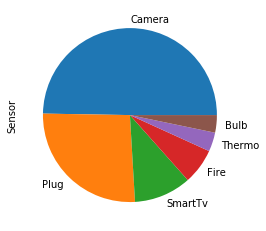

In [4]:
df['Sensor'].value_counts().plot(kind='pie')
plt.show()


In [5]:
df_describe = df[['TotPkts', 'TotBytes', 'Dur', 'Load', 'Loss', 'Rate', 'Sensor']].groupby('Sensor').describe()
df_describe.columns = df_describe.columns.swaplevel(0, 1)
df_describe[['mean', 'std']]

mean                                                     \
            TotPkts       TotBytes       Dur          Load        Loss   
Sensor                                                                   
Bulb       6.085784     550.250000  0.569738  1.149137e+06    1.411765   
Camera   599.530995  797031.570399  4.611342  1.314522e+06  152.354958   
Fire       5.149038     661.947115  0.217794  2.282927e+06    1.228365   
Plug       5.154103     667.745897  0.305870  2.384826e+06    1.081763   
SmartTv   78.685629  109759.097305  3.613835  6.554276e+05   20.526946   
Thermo     5.278652     635.793258  0.315112  7.591378e+05    0.689888   

                              std                                         \
                 Rate     TotPkts       TotBytes       Dur          Load   
Sensor                                                                     
Bulb     28100.647151    5.758446     713.183958  1.208773  2.158059e+06   
Camera     395.496371  431.521105  516593.014043  0.666227  8.237476e+05   
Fire     11105.554969    2.932354     364.706363  0.804836  2.913492e+06   
Plug     38880.505092    3.146995     398.452004  0.943939  2.868407e+06   
SmartTv   1667.774855   86.817472  119535.189131  2.011742  9.844782e+05   
Thermo   14061.403626    3.637098     362.795270  0.886773  1.676393e+06   

                                    
               Loss           Rate  
Sensor                              
Bulb       2.478816  127151.997356  
Camera   134.532068   13362.330751  
Fire       1.037568   23924.524768  
Plug       1.061359  169951.737762  
SmartTv   26.052512   22609.689533  
Thermo     1.637954   79241.390937

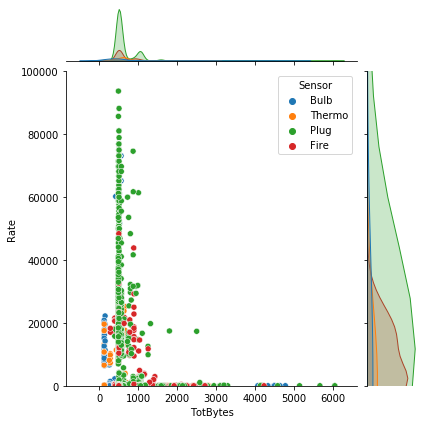

In [18]:
sns.jointplot(data=df.loc[df["Sensor"].isin(['Thermo', 'Bulb', 'Plug', 'Fire'])], x="TotBytes", y="Rate", hue="Sensor", ylim=(0, 100000))
plt.show()

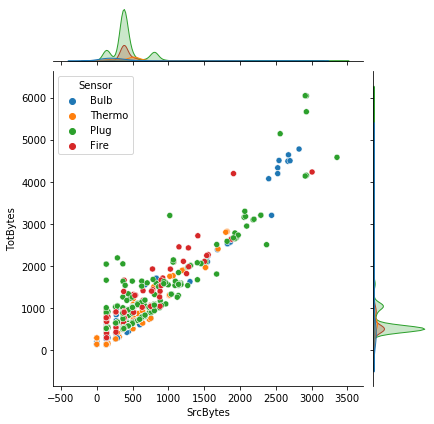

In [68]:
xval = "SrcBytes"
yval = "TotBytes"


sns.jointplot(data=df.loc[df["Sensor"].isin(['Thermo', 'Bulb', 'Plug', 'Fire'])], 
             x="SrcBytes", y="TotBytes", hue="Sensor")
fig.suptitle("{} vs {}".format(xval, yval))
plt.show()

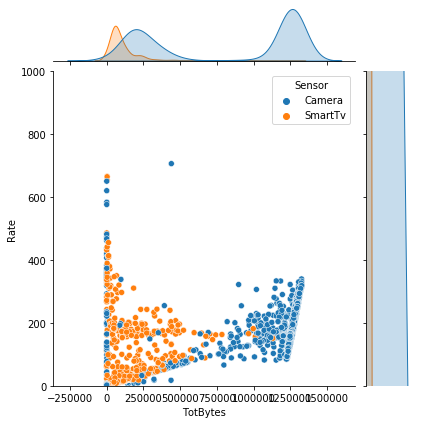

In [55]:
sns.jointplot(data=df.loc[df["Sensor"].isin(['SmartTv', 'Camera'])], x="TotBytes", y="Rate", hue="Sensor", ylim=(0, 1000))

# Data cleaning

#### Deleting columns with only one value

In [191]:
print("Columns with only one element: {}".format(df.loc[:,df.apply(pd.Series.nunique) == 1].columns.to_list()))

df_clean_cols = df.loc[:,df.apply(pd.Series.nunique) != 1]

print("Removed!")
print("Feature number => {}".format(df_clean_cols.shape[1]))

Columns with only one element: ['Proto', 'DstAddr', 'Retrans', 'SrcRetra', 'DstRetra', 'pRetran']
Removed!
Feature number => 27


In [192]:
null_counts = df_clean_cols.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
StartTime    0
SrcAddr      0
TotPkts      0
SrcPkts      0
DstPkts      0
TotBytes     0
SrcBytes     0
DstBytes     0
Dur          0
Load         0
SrcLoad      0
DstLoad      0
Loss         0
SrcLoss      0
DstLoss      0
pLoss        0
Rate         0
SrcRate      0
DstRate      0
Dir          0
State        0
SrcWin       0
DstWin       0
TcpRtt       0
SynAck       0
AckDat       0
Sensor       0
dtype: int64


##### Checking type of feature 

In [194]:
print("Data types and their frequency\n{}".format(df_clean_cols.dtypes.value_counts()))
print("\n\n")
object_columns_df = df_clean_cols.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

Data types and their frequency
float64    13
int64       9
object      3
dtype: int64



Dir         ->
State      CON
Sensor    Bulb
Name: 0, dtype: object


###### Drop useless features

In [193]:
useless_cols = ['StartTime', 'SrcAddr']
try:
    df_clean_cols.drop(useless_cols, axis=1, inplace=True)
except KeyError as e:
    print("Already removed!")
print("Feature number => {}".format(df_clean_cols.shape[1]))

Feature number => 25


/Users/drosdesd/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###### Check columns with few unique values

In [195]:
from numpy import unique

for i in df_clean_cols.columns:
    num = len(df_clean_cols[i].unique())
    percentage = float(num) / df_clean_cols.shape[0] * 100
    print('%s, %d, %.1f%%' % (i, num, percentage))

TotPkts, 695, 5.5%
SrcPkts, 375, 3.0%
DstPkts, 412, 3.3%
TotBytes, 4685, 37.3%
SrcBytes, 3223, 25.7%
DstBytes, 1837, 14.6%
Dur, 8046, 64.1%
Load, 10938, 87.1%
SrcLoad, 10044, 80.0%
DstLoad, 9895, 78.8%
Loss, 548, 4.4%
SrcLoss, 548, 4.4%
DstLoss, 11, 0.1%
pLoss, 2648, 21.1%
Rate, 9748, 77.6%
SrcRate, 9568, 76.2%
DstRate, 9678, 77.1%
Dir, 4, 0.0%
State, 4, 0.0%
SrcWin, 4, 0.0%
DstWin, 1329, 10.6%
TcpRtt, 88, 0.7%
SynAck, 21, 0.2%
AckDat, 79, 0.6%
Sensor, 6, 0.0%


In [196]:
df_clean_cols

,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Dur,Load,SrcLoad,DstLoad,...,SrcRate,DstRate,Dir,State,SrcWin,DstWin,TcpRtt,SynAck,AckDat,Sensor
0,32,18,14,4332,2528,1804,1.675503,19404.3,11401.90,8002.37,...,10.146207,7.758864,->,CON,42496.0,43008.0,0.745406,0.000024,0.745382,Bulb
1,24,14,10,2526,1826,700,1.366122,13621.0,9931.76,3689.27,...,9.515987,6.587991,->,CON,42496.0,43520.0,0.116448,0.000018,0.116430,Bulb
4,34,18,16,4506,2546,1960,1.007425,33693.8,19098.10,14595.60,...,16.874706,14.889446,->,CON,42496.0,43008.0,0.023110,0.000022,0.023088,Bulb
5,34,20,14,4492,2674,1818,1.329584,25451.5,15288.90,10162.50,...,14.290184,9.777494,->,CON,42496.0,43008.0,0.474907,0.000023,0.474884,Bulb
6,24,14,10,2554,1854,700,0.926875,20300.4,14862.80,5437.62,...,14.025624,9.710048,->,CON,42496.0,43520.0,0.118611,0.000022,0.118589,Bulb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14082,466,420,46,1228092,1223768,4324,4.978014,1968793.0,1961995.00,6797.89,...,84.170113,9.039749,->,CON,42496.0,83865.0,6.460323,0.000025,6.460298,Camera
14085,590,422,168,1234988,1223900,11088,4.978563,1979723.0,1962012.00,17711.10,...,84.562553,33.543816,->,CON,42496.0,81228.0,8.477456,0.000018,8.477438,Camera
14087,4,2,2,510,378,132,0.000129,1581395.0,1172093.00,4093023.00,...,7751.938477,7751.938477,<?>,CON,83.0,85.0,0.000000,0.000000,0.000000,Plug
14089,460,346,114,1006312,998788,7524,4.990145,1608546.0,1596590.00,11956.30,...,69.136261,22.644632,->,CON,42496.0,46935.0,8.489948,0.000030,8.489918,Camera


###### Remove low variance columns

--> Threshold=0.00, Features=22
Low variance features:  []
--> Threshold=0.05, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.10, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.15, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.20, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.25, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.30, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.35, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.40, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.45, Features=21
Low variance features:  ['SynAck']
--> Threshold=0.50, Features=20
Low variance features:  ['SynAck', 'DstLoss']
--> Threshold=0.55, Features=20
Low variance features:  ['SynAck', 'DstLoss']


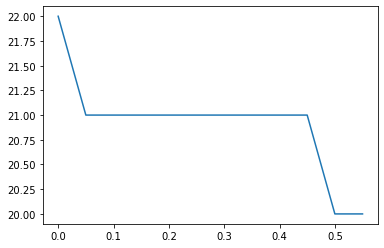

22


In [185]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np
from matplotlib import pyplot
# split data into inputs and outputs
X = df._get_numeric_data()
#data = data.values
X = data
y = df.values[:, -1]

all_features = X.columns.to_list()
thresholds = np.arange(0.0, 0.60, 0.05)

results = list()
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    remained_features = data[data.columns[transform.get_support(indices=True)]].columns.to_list()
    print('--> Threshold=%.2f, Features=%d' % (t, n_features))
    print("Low variance features: ", list(set(all_features) - set(remained_features)))
    results.append(n_features)
    
# threshold vs number of selected features
pyplot.plot(thresholds, results)
pyplot.show()


In [199]:
# Drop columns
useless_cols = ['SynAck', 'DstLoss']
df_variance = df_clean_cols
try:
    df_variance.drop(useless_cols, axis=1, inplace=True)
except KeyError as e:
    print("Already removed!")
print("Feature number => {}".format(df_variance.shape[1]))


Already removed!
Feature number => 23


### Row with duplicated data

In [211]:
# check duplicates
print("Size of the dataset before row cleaning:", df_variance.shape)
dups = df_variance.duplicated()
print(dups.any())
df_clean = df_variance.drop_duplicates(inplace=False)
print("Size of the dataset after row cleaning:", df_clean.shape)

# TODO: clean only high value counts sensors

Size of the dataset before row cleaning: (12554, 23)
True
Size of the dataset after row cleaning: (11866, 23)


In [214]:
df_clean['Sensor'].value_counts()

Camera     6215
Plug       2802
SmartTv    1334
Fire        692
Thermo      433
Bulb        390
Name: Sensor, dtype: int64

## ML start

In [221]:
from sklearn.utils import resample

# Separate majority and minority classes
df_camera = df_clean[df_clean.Sensor=='Camera']
df_plug = df_clean[df_clean.Sensor=='Plug']
df_tv = df_clean[df_clean.Sensor=='SmartTv']
df_fire = df_clean[df_clean.Sensor=='Fire']
df_thermo = df_clean[df_clean.Sensor=='Thermo']
df_bulb = df_clean[df_clean.Sensor=='Bulb']
 
# Downsample majority class
df_camera_downsampled = resample(df_camera, 
                                 replace=False,    # sample without replacement
                                 n_samples=500,     # to match minority class
                                 random_state=123) # reproducible results

df_plug_downsampled = resample(df_plug, 
                                 replace=False,    # sample without replacement
                                 n_samples=500,     # to match minority class
                                 random_state=123) # reproducible results
df_tv_downsampled = resample(df_tv, 
                                 replace=False,    # sample without replacement
                                 n_samples=500,     # to match minority class
                                 random_state=123) # reproducible results

df_fire_downsampled = resample(df_fire, 
                                 replace=False,    # sample without replacement
                                 n_samples=500,     # to match minority class
                                 random_state=123) # reproducible results
 
df_downsampled = pd.concat([df_camera_downsampled, df_plug_downsampled, df_tv_downsampled, df_fire_downsampled, df_thermo, df_bulb])


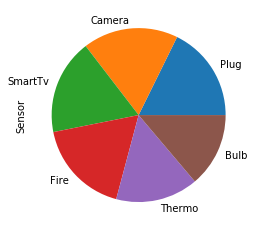

In [222]:
df_downsampled['Sensor'].value_counts().plot(kind='pie')
plt.show()

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
# Separate input features (X) and target variable (y)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

y = df_downsampled.Sensor
X = df_downsampled.drop(['Sensor'], axis=1).select_dtypes(include=numerics)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_2) )

['Bulb' 'Camera' 'Fire' 'Plug' 'SmartTv' 'Thermo']
0.49380092100602196


/Users/drosdesd/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Camera' 'SmartTv' 'Camera' ... 'Fire' 'Fire' 'Plug']


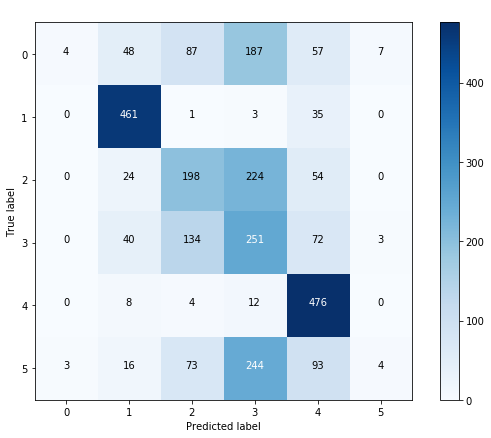

In [240]:
from sklearn.metrics import confusion_matrix 

labels = ['Bulb', 'Camera', 'Fire', 'Plug', 'SmartTv', 'Thermo']
print(pred_y_2)
cm = confusion_matrix(y, pred_y_2) 
plot_confusion_matrix(cm, None, normalize=False, filen='LR_CM_C.pdf')

In [228]:

def plot_confusion_matrix(cm,
                          target_names,
                          title=' ',
                          filen='graph.pdf',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filen, format='pdf', dpi=1000)
    plt.show()

In [ ]:
# attacco - no attacco
# ognuno con la sua etichetta -> attacco / no attacco